In [1]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [14]:
data = np.loadtxt('train.csv', delimiter=',')
x_vals = data[:, :-1]
# x_vals=scale(x_vals)
n=len(x_vals[0])
Y = data[:, -1]
y_vals1 = np.array([1 if y==1 else -1 for y in Y])
y_vals2 = np.array([1 if y==2 else -1 for y in Y])
y_vals3 = np.array([1 if y==3 else -1 for y in Y])
y_vals4 = np.array([1 if y==4 else -1 for y in Y])
y_vals5 = np.array([1 if y==5 else -1 for y in Y])
y_vals6 = np.array([1 if y==6 else -1 for y in Y])
y_vals7 = np.array([1 if y==7 else -1 for y in Y])
y_vals = np.array([y_vals1, y_vals2, y_vals3,y_vals4,y_vals5, y_vals6,y_vals7])

In [15]:
print(x_vals.shape)
print(y_vals.shape)
print(n)

(15120, 55)
(7, 15120)
55


In [16]:
batch_size = 50
lr=0.01 #learning rate
x_data = tf.placeholder(shape=[None, n], dtype=tf.float32)
y_target = tf.placeholder(shape=[7, None], dtype=tf.float32)
prediction_grid = tf.placeholder(shape=[None, n],dtype=tf.float32)
b = tf.Variable(tf.random_normal(shape=[7,batch_size]))


In [17]:
gamma = tf.constant(-1.0) 
dist = tf.reduce_sum(tf.square(x_data), 1)
dist = tf.reshape(dist, [-1,1])
sq_dists = tf.add(tf.subtract(dist, tf.multiply(2., tf.matmul(x_data,tf.transpose(x_data)))), tf.transpose(dist))
my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_dists)))

In [18]:
#batch multiplication
def reshape_matmul(mat):
    v1 = tf.expand_dims(mat, 1)
    v2 = tf.reshape(v1, [7, batch_size, 1])
    return(tf.matmul(v2, v1))

In [19]:
#loss
model_output = tf.matmul(b, my_kernel)
first_term = tf.reduce_sum(b)
b_vec_cross = tf.matmul(tf.transpose(b), b)
y_target_cross = reshape_matmul(y_target)
second_term = tf.reduce_sum(tf.multiply(my_kernel,tf.multiply(b_vec_cross, y_target_cross)),[1,2])
loss = tf.reduce_sum(tf.negative(tf.subtract(first_term, second_term)))
rA = tf.reshape(tf.reduce_sum(tf.square(x_data), 1),[-1,1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid), 1),[-1,1])

In [20]:

pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2., tf.matmul(x_data,tf.transpose(prediction_grid)))), tf.transpose(rB))
pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist)))
prediction_output = tf.matmul(tf.multiply(y_target,b),pred_kernel)
prediction = tf.arg_max(prediction_output-tf.expand_dims(tf.reduce_mean(prediction_output,1), 1), 0)

In [21]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction,tf.argmax(y_target,0)), tf.float32))
my_opt = tf.train.GradientDescentOptimizer(lr)
train_step = my_opt.minimize(loss)

In [22]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
loss_vec = []
batch_accuracy = []

In [23]:
for i in range(1000):
    rand_index = np.random.choice(len(x_vals),
    size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = y_vals[:,rand_index]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x,y_target: rand_y})
    loss_vec.append(temp_loss)
    acc_temp = sess.run(accuracy, feed_dict={x_data: rand_x,y_target: rand_y, prediction_grid:rand_x})
    batch_accuracy.append(acc_temp)
    if (i+1)%5==0:
        print('Step #' + str(i+1))
        print('Loss = ' + str(temp_loss))

Step #5
Loss = 85.14513
Step #10
Loss = -436.90842
Step #15
Loss = -675.20776
Step #20
Loss = -735.7975
Step #25
Loss = -718.7168
Step #30
Loss = -697.3698
Step #35
Loss = -868.96826
Step #40
Loss = -771.4632
Step #45
Loss = -731.0486
Step #50
Loss = -644.8097
Step #55
Loss = -754.6078
Step #60
Loss = -758.493
Step #65
Loss = -861.2615
Step #70
Loss = -642.52637
Step #75
Loss = -838.9923
Step #80
Loss = -775.6709
Step #85
Loss = -675.3914
Step #90
Loss = -739.6745
Step #95
Loss = -746.61426
Step #100
Loss = -691.7855
Step #105
Loss = -746.8374
Step #110
Loss = -861.9909
Step #115
Loss = -790.248
Step #120
Loss = -774.0061
Step #125
Loss = -743.1273
Step #130
Loss = -742.07764
Step #135
Loss = -799.04834
Step #140
Loss = -665.19324
Step #145
Loss = -748.92236
Step #150
Loss = -735.82556
Step #155
Loss = -722.54663
Step #160
Loss = -760.6524
Step #165
Loss = -803.3796
Step #170
Loss = -795.5748
Step #175
Loss = -815.56195
Step #180
Loss = -734.4076
Step #185
Loss = -708.86145
Step #190
L

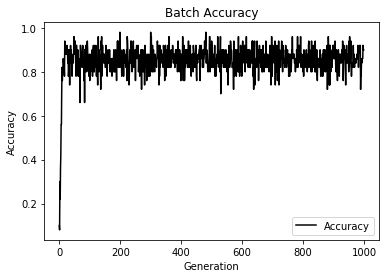

In [24]:
import matplotlib.pyplot as plt

plt.plot(batch_accuracy, 'k-', label='Accuracy')
plt.title('Batch Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

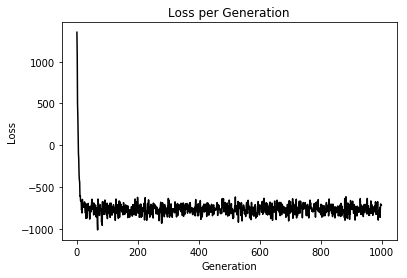

In [25]:


plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()